In [9]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [10]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data Handling in PyG

### Data

Let's create a dummy graph

In [11]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [12]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

In [13]:
edges_attr = np.random.choice(3,500)

In [14]:
ys = torch.rand((100)).round().long()

Convert the graph information into a PyG Data object

In [15]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [16]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

Let's visualize the information contained in the data object

In [17]:
for prop in graph:
    print(prop)

('x', tensor([[0.8725, 0.5657, 0.2537,  ..., 0.3284, 0.5579, 0.4896],
        [0.0669, 0.7450, 0.5907,  ..., 0.7730, 0.7716, 0.8573],
        [0.7533, 0.2567, 0.6629,  ..., 0.9455, 0.5516, 0.2307],
        ...,
        [0.0109, 0.0243, 0.6251,  ..., 0.1366, 0.2111, 0.9041],
        [0.1924, 0.7111, 0.0840,  ..., 0.3931, 0.9229, 0.0901],
        [0.7472, 0.3370, 0.0306,  ..., 0.1986, 0.8199, 0.2094]]))
('edge_index', tensor([[26,  3, 71, 64, 24, 94,  2, 84, 15, 42, 71, 54, 47, 83, 41, 35, 89,  6,
         99, 27, 13, 41, 54, 42, 46, 74, 41, 16, 62, 66,  9, 46, 53, 48, 13, 89,
         20, 33,  0, 40, 47,  8, 11, 32,  6,  5, 24, 56, 70, 90,  6, 65, 87,  9,
         38, 69, 52, 60, 36, 42, 17,  6,  9, 70, 38, 35, 75, 23, 14,  0, 15, 25,
         92, 92, 58, 82, 84, 27, 92, 54, 33, 78, 17, 43, 49, 37, 57, 94, 19, 19,
         28, 37, 93, 10, 76, 99, 23, 10, 54, 86, 43, 39, 38, 19, 48,  2, 43, 34,
         62, 71, 96, 26, 96, 92,  3, 85, 53, 82, 71, 20, 19, 28, 24, 14, 55, 77,
         29, 

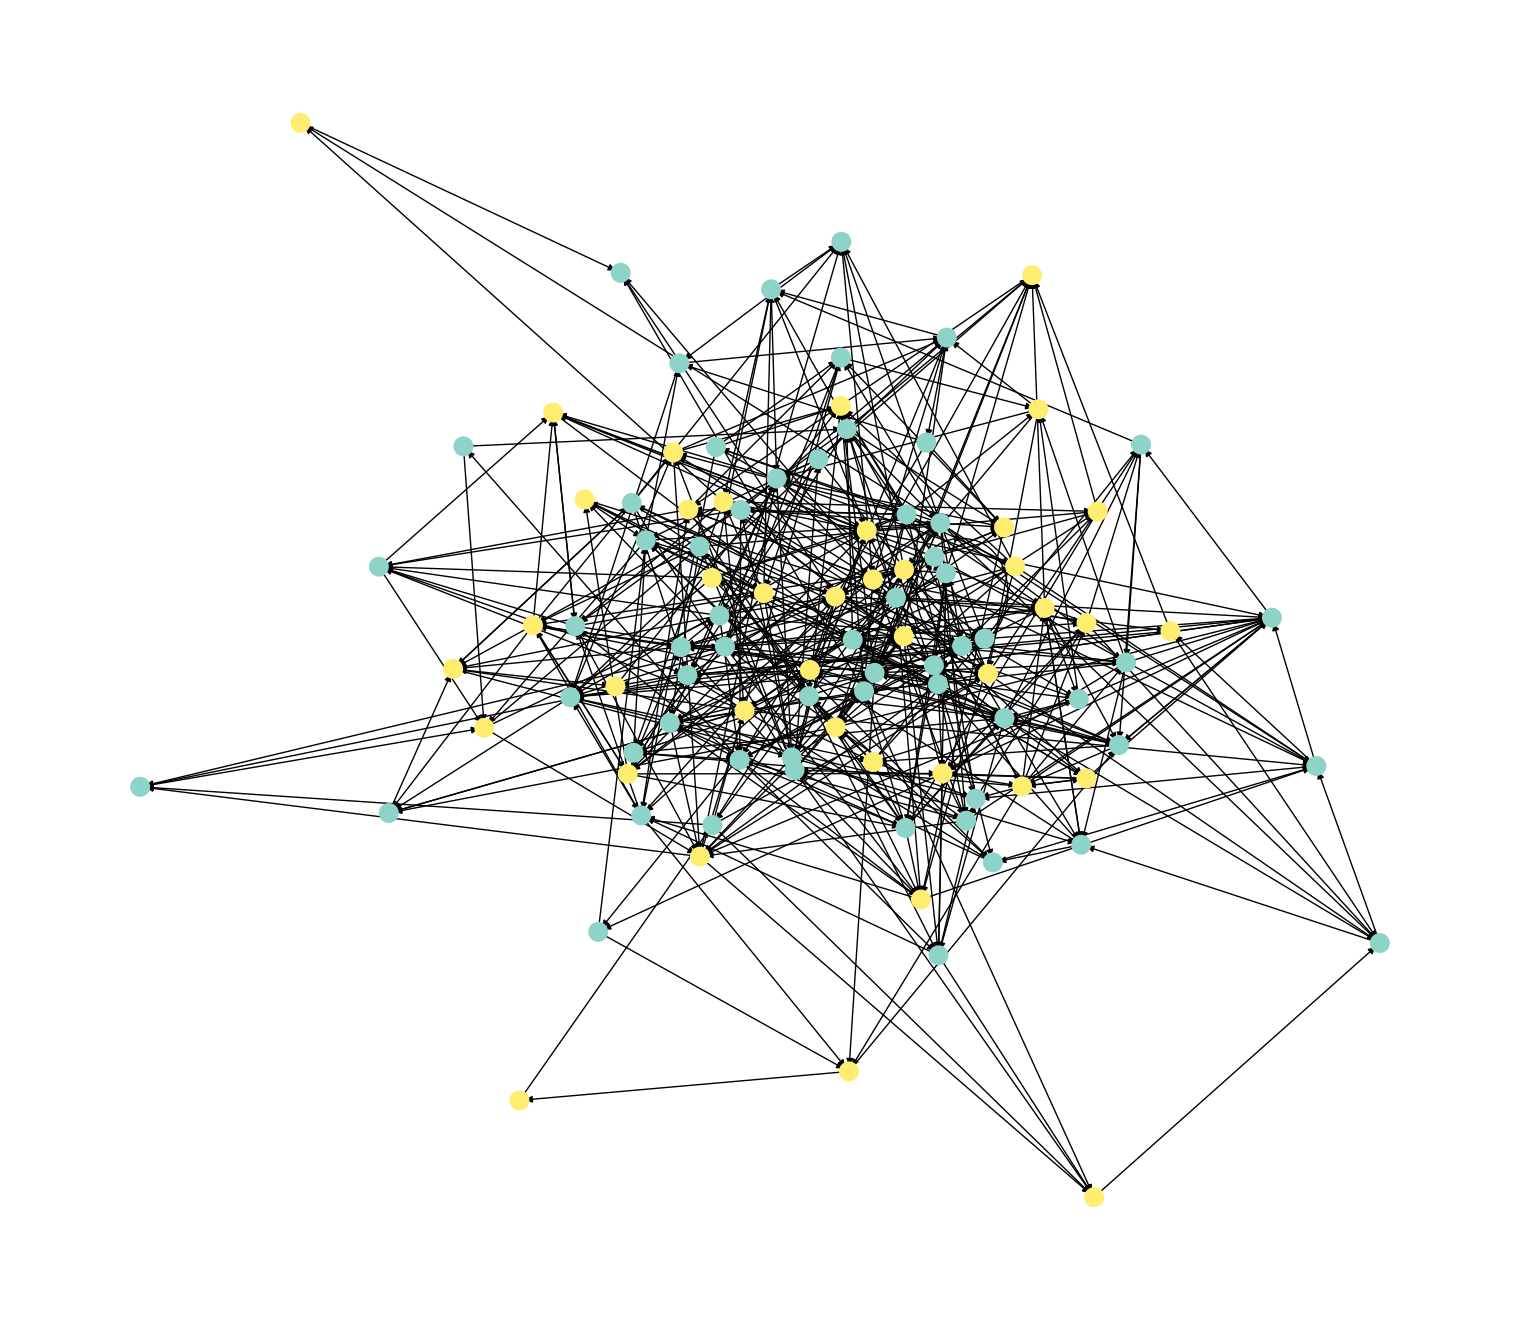

In [18]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [19]:
graph2 = graph

In [20]:
batch = data.Batch().from_data_list([graph, graph2])

In [21]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:
 2


### Cluster

ClusterData groups the nodes of a graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clusters

In [ ]:
#cluster = data.ClusterData(graph, 5)

In [ ]:
#clusterloader = data.ClusterLoader(cluster)

### Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [22]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                                  shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [23]:
for s in sampler:
    print(s)
    break

(4, tensor([ 0,  1,  2,  3, 37, 11,  9, 67, 61, 51, 86, 39, 28, 84, 76, 43, 89, 80,
        35, 26, 21, 18, 92, 47, 20, 75, 41, 87, 85, 42, 36, 97, 77, 64, 98, 65,
        15, 90, 83, 52, 50, 82, 74, 66, 58, 56,  5, 25, 14, 59, 23, 71, 48, 24,
        12,  7]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6, 14, 15,  7,  8,  9, 16, 17, 18, 19, 20, 21, 10, 11, 12, 22,
         23, 24,  3,  5, 10, 13, 25, 25, 25, 26,  6, 12, 27, 28, 29, 30,  0, 10,
         11, 22, 31, 32, 33,  4,  9, 16, 26, 26, 34, 14, 35, 36,  7,  7, 37, 38,
         39, 40, 29, 37, 41, 42, 43, 44, 45, 46,  8, 16, 16, 27, 28, 47, 47, 48,
         49, 50,  5,  6,  7, 51, 52, 53, 54, 55],
        [ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
          2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
          8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
         11, 11, 1

In [24]:
print("Batch size:", s[0])
print("Number of unique nodes involved in the sampling:",len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

Batch size: 4
Number of unique nodes involved in the sampling: 56
Number of neighbors sampled: 82 12


### Datasets

List all the available datasets

In [25]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'AQSOL',
 'MoleculeNet',
 'PCQM4Mv2',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'GDELTLite',
 'ICEWS18',
 'GDELT',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'WordNet18',
 'WordNet18RR',
 'FB15k_237',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'HeterophilousGraphDataset',
 'Actor',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airports',
 'LRGBDataset',
 'MalNetTiny',
 'OMDB',
 'PolBlogs',
 'EmailEUCore',
 'LINKXDataset',
 'Elliptic

In [27]:
!pip install --upgrade torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.10.0+cu113.html

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu113.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-cluster: filename=torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl size=728767 sha256=ef6909567374a7c730592dba9ae2ef6f13c871ef4f7991966f7e79d0b823984c
  Stored in directory: /root/.cache/pip/wheels/51/78/c3/536637b3cdcc3313aa5e8851a6c72b97f6a01877e68c7595e3
  Created wheel for torch-spline-conv: filename=torch_spline_conv-1.2.2-cp310-cp310-linux_x86_64.whl size=227095 sha256=2aa47dc42637f116902d0fb8607a8fb4cf2380c16af970361dd705b7742dbabe
  Stored in directory: /root/.cache/pip/wheels/fc/34/be/187e4b5f5ccefecca2c1a5dfc8da244ec50baa1f33c7b8c9a1
Successfully built torch-cluster torch-spline-conv


In [29]:
# The correct code
import torch_geometric.transforms as T

name = 'Cora'
transform = T.Compose([
    T.RandomNodeSplit('train_rest', num_val=500, num_test=500),  # Changed to RandomNodeSplit
    T.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=T.NormalizeFeatures(), transform=transform) # Updated import to T

Processing...
Done!


In [28]:
name = 'Cora'
transform = transforms.Compose([
    transforms.AddTrainValTestMask('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

AttributeError: module 'torch_geometric.transforms' has no attribute 'AddTrainValTestMask'

In [30]:
aids = datasets.TUDataset(root="./data", name="AIDS")

Processing...
Done!


In [31]:
print("AIDS info:")
print('# of graphs:', len(aids))
print('# Classes (graphs)', aids.num_classes)
print('# Edge features', aids.num_edge_features)
print('# Edge labels', aids.num_edge_labels)
print('# Node features', aids.num_node_features)

AIDS info:
# of graphs: 2000
# Classes (graphs) 2
# Edge features 3
# Edge labels 3
# Node features 38


In [32]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

Cora info:
# of graphs: 1
# Classes (nodes) 7
# Edge features 1
# Node features 1433


In [33]:
aids.data

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[31385, 38], edge_index=[2, 64780], edge_attr=[64780, 3], y=[2000])

In [34]:
aids[0]

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])

In [35]:
cora.data

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [36]:
cora[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1])

In [37]:
cora_loader = data.DataLoader(cora)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [38]:
for l in cora_loader:
    print(l)
    break

DataBatch(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1], batch=[2708], ptr=[2])
